# FINAL PROJECT 1: REGRESSION
Project ini untuk memenuhi tugas dari Course Introduction To Python For Data Science
## Our Members:
- Yusraini Nurul Asra
- Arya Rahman
- Monica Belinda

## A. Introduction
### Abstract
Di era digital ini, perkembangan teknologi saat ini sangat pesat hingga dapat mengubah gaya hidup masyarakat umum. Hal ini dapat berdampak baik dalam dalam banyak hal, misalnya mobilitas perjalanan. Meningkatnya akses internet melalui smartphone di kalangan masyarakat dunia mengundang hadirnya **transportasi online**. Pada tahun 2018, New York telah menunjukkan peningkatan yang kuat dalam aktivitas bisnis, sementara juga memimpin skor global dalam _human capital_. Hal ini berarti, New York menjadi salah satu kota paling berpengaruh di dunia (Kearney, Global Cities Report 2018).

Di New York, ride-hailing yang paling populer adalah **Uber dan Lyft**. Secara umum, tidak terdapat banyak perbedaan dari segi biaya dan waktu antara moda ride-hailing dengan taksi. Keunggulan moda ride-hailing dibandingkan dengan taksi adalah dalam aspek kenyamanan. Calon penumpang tidak harus menunggu di pinggir jalan, namun dapat menggunakan aplikasi pada smartphone untuk memanggil pengemudi.

Untuk membantu masyarakat New York City dalam memilih transportasi online yang terbaik dengan harga murah berdasarkan berbagai macam pertimbangan, seperti jarak, pemilihan tipe kendaraan, dll, maka akan dilakukan analisis serta perbandingan antara **Linear Regression dengan Polynomial Regression** dengan melihat nilai kebaikan model (R^2, MAE, RMSE)

### Data
Dataset yang digunakan yaitu Uber vs Lyft Dataset New York, USA yang berisi record data perjalanan taksi online Uber dan Lyft di New York, USA. Dataset ini memiliki 57 atribut dengan record sebanyak 693071 data. 

### Objectives
Objective yang ingin dicapai dalam analisis ini, yaitu:
- Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi tarif harga transportasi online.
- Menemukan model terbaik untuk digunakan dalam memprediksi tarif harga transportasi online.
- Memberikan insight yang dapat membantu pihak penumpang maupun pihak transportasi online dalam bentuk charts.

## B. Import Libraries

In [1]:
# Untuk menonaktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

# Library for DataFrame
import pandas as pd
import numpy as np

# Library for Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(["seaborn"])
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS

# Library for Analysis
import scipy
import sympy as sp
from dython.nominal import associations
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import max_error,mean_absolute_error,median_absolute_error,mean_squared_error,r2_score
from joblib import dump

## C. Data Loading

### Import Dataset

In [2]:
# Membaca data dan menampilkan data
df = pd.read_csv("rideshare_kaggle.csv")
pd.set_option("display.max.columns", None)
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

In [3]:
# Melihat jumlah baris dan jumlah kolom pada data
print("Data tersebut memiliki jumlah baris",len(df), "dan kolom berjumlah",len(df.columns))

Data tersebut memiliki jumlah baris 693071 dan kolom berjumlah 57


### Type of Data

In [4]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

### Statistical Data

In [5]:
# Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

### Check Missing Values

In [6]:
# Mengecek missing values dan hanya menampilkan column yang memiliki missing values dengan jumlah missing valuesnya
df.isnull().sum()[df.isnull().sum() > 0]

price    55095
dtype: int64

### Check Duplicated Data

In [7]:
# Mengecek data duplikat
df.duplicated().sum()

0

### Unique Values

In [8]:
# Melihat nilai unique pada data
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

## D. Data Cleaning

### Handling Missing Values

In [9]:
# Melihat persentase missing values dari keseluruhan data
print(round((55095/len(df)*100), 2),'%')

7.95 %


Karena hanya 7.95 % missing values dari keseluruhan data, maka akan dilakukan dropna agar mendapatkan akurasi yang lebih baik nantinya.

In [10]:
# Menghapus baris dengan kolom null
df.dropna(axis=0,inplace=True)

### Drop Unnecessary Columns

In [11]:
# Mengecek nunique masing-masing columns, untuk columns yang memiliki semua data yang sama atau semua data yang berbeda 
print(df.nunique()[df.nunique() == 1])
print(df.nunique()[df.nunique() == len(df)])

timezone    1
dtype: int64
id    637976
dtype: int64


Drop columns yang tidak diperlukan seperti:
- *id*: karena setiap rows berbeda/unik
- *datetime*: sudah direpresentasikan oleh columns lain seperti *hour*, *day*, and *month*
- *timestamp*: mirip seperti column *datetime* 
- *timezone*: hanya ada satu timezone di dataframe

In [12]:
# Kemudian akan dilakukan drop columns pada columns tersebut ("timezone","id"). Serta columns yang tidak dibutuhkan seperti "timestamp" dan "datetime" (karena sudah ada column "day", "month"). 
df = df.drop(["id","timestamp","datetime","timezone"],axis=1)

### Removing Outliers

Untuk mendapatkan hasil yang lebih akurat nantinya, maka perlu dilakukan removing outliers (pencilan). Removing outliers dilakukan pada column *price* dengan metode IQR (Interquartile Range).

In [13]:
price_q1 = df["price"].describe().loc["25%"]
price_q3 = df["price"].describe().loc["75%"]
price_iqr = price_q3 - price_q1

price_lower_limit = price_q1 - (1.5 * price_iqr)
price_upper_limit = price_q3 + (1.5 * price_iqr)

df_without_outliers = df[(df["price"] >= price_lower_limit) & (df["price"] <= price_upper_limit)].copy()

### Select Columns with Highest Correlation 

Untuk mencari korelasi antara variabel numerical dan categorical digunakan library *dython*. Lalu untuk meningkatkan akurasi serta meminimalisir computational cost, maka kami mengambil 7 columns dengan correlation tertinggi. Tanda $+$ dan $-$ hanya mengindikasikan arah hubungan dua variabel, oleh karena itu kami mensortir absolute dari correlation agar mempermudah.

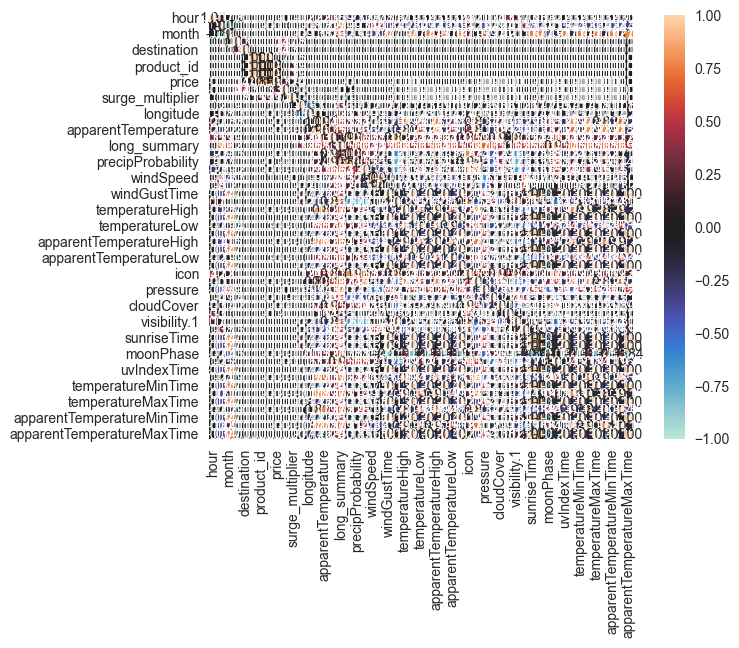

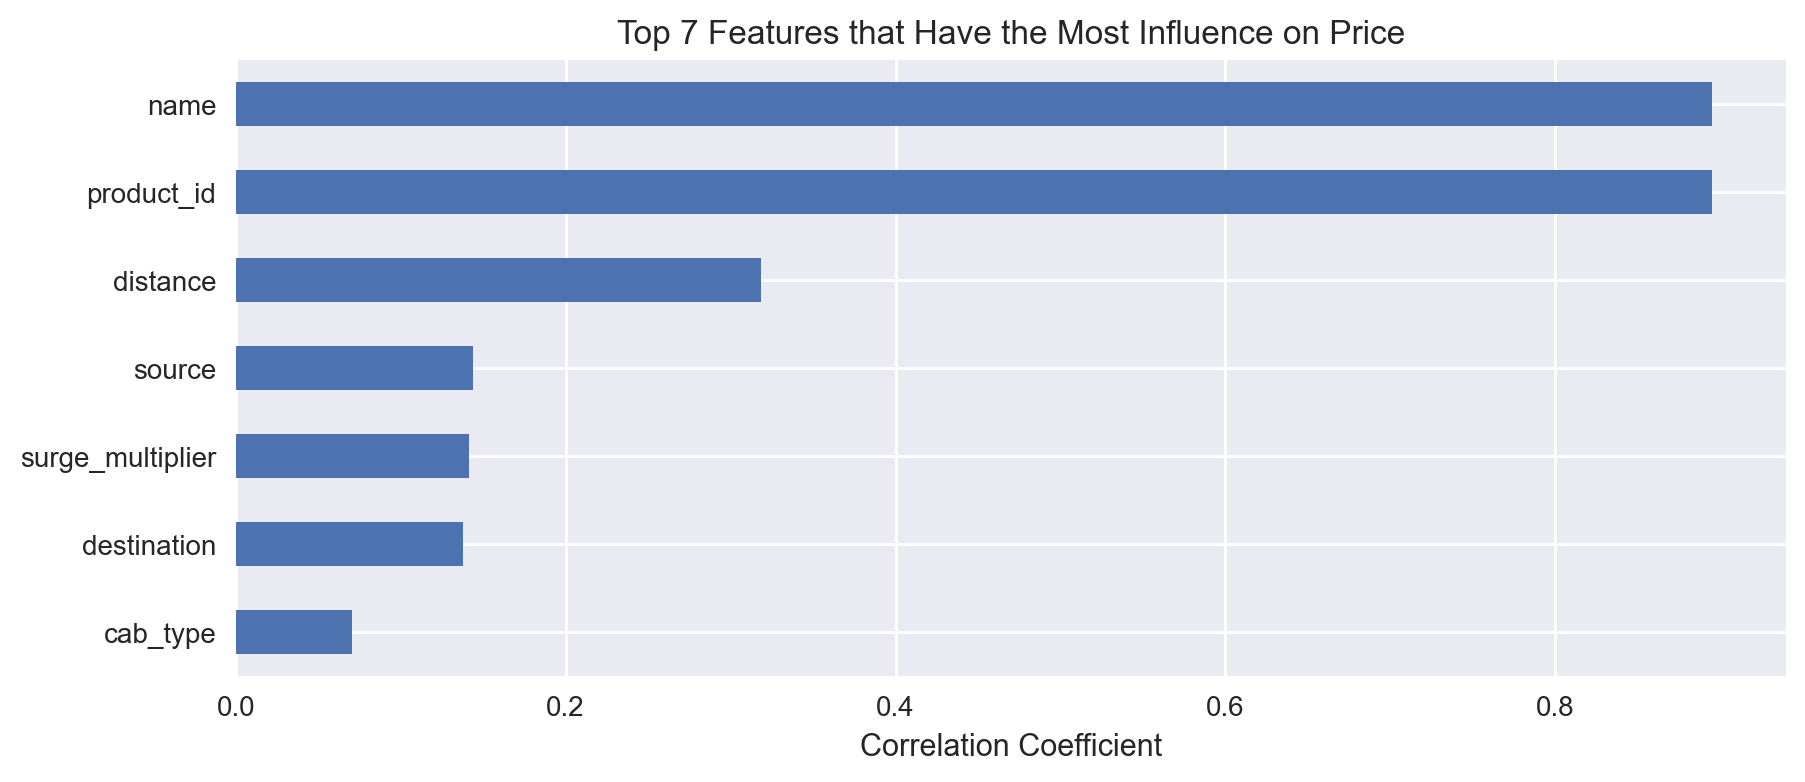

In [14]:
corr = associations(df_without_outliers)

top_7_corr = abs(corr["corr"][["price"]].drop("price")).sort_values("price", ascending=False).head(7)

fig = plt.figure(figsize=(10, 4), dpi=200)
top_7_corr.sort_values("price").plot(
    kind="barh",
    legend=None,
    ax=plt.gca()
)
plt.title("Top 7 Features that Have the Most Influence on Price")
plt.xlabel("Correlation Coefficient")
plt.show()


Setelah mengetahui 7 features column yang paling mempengaruhi *price*, maka hanya akan digunakan 7 column tersebut pada dataframe.

In [15]:
df_without_outliers = df_without_outliers[list(top_7_corr.index) + ["price"]]
df_without_outliers.head()

,product_id,name,distance,source,surge_multiplier,destination,cab_type,price
0,lyft_line,Shared,0.44,Haymarket Square,1.0,North Station,Lyft,5.0
1,lyft_premier,Lux,0.44,Haymarket Square,1.0,North Station,Lyft,11.0
2,lyft,Lyft,0.44,Haymarket Square,1.0,North Station,Lyft,7.0
3,lyft_luxsuv,Lux Black XL,0.44,Haymarket Square,1.0,North Station,Lyft,26.0
4,lyft_plus,Lyft XL,0.44,Haymarket Square,1.0,North Station,Lyft,9.0


In [16]:
# Melihat total baris dan kolom pada df_clean
print(df.shape)

(637976, 53)


In [17]:
# Melihat data teratas
df.head()

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## E. Exploration Data Analysis

### Which One is More Popular? Uber or Lyft? 

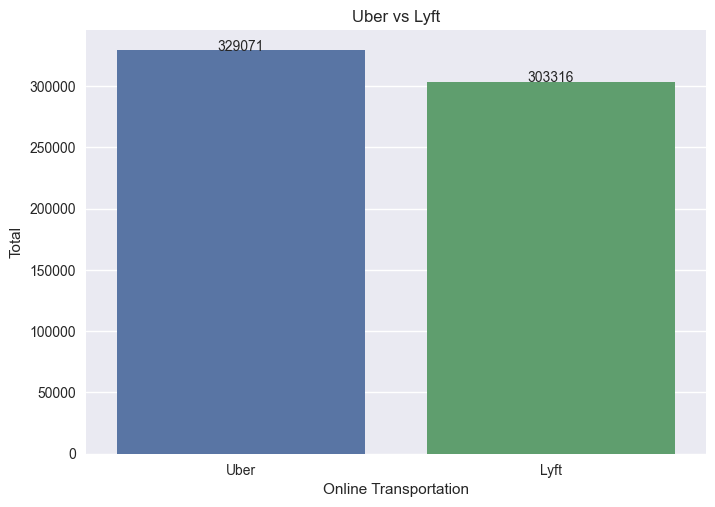

In [18]:
# Membuat variabel df_transport_name berisi total data dari kolom transport_name
df_transport_name = df_without_outliers['cab_type'].value_counts()
df_transport_name = pd.DataFrame(df_transport_name).reset_index()
x = df_transport_name['cab_type']
y = df_transport_name['count']

# Memvisualisasikan kolom transport_name dalam bentuk bar charts
ax = sns.barplot(x=x, y=y)
plt.xlabel('Online Transportation')
plt.ylabel('Total')
plt.title('Uber vs Lyft')
for i, v in enumerate(y):
   ax.text(i, v + 0.2, str(v), ha='center')
plt.show()

Dari barchart tersebut dapat dilihat bahwa Transportasi Online yang lebih populer adalah Uber dengan 329071 total pemesanan, sedangkan total pemesanan Lyft sebanyak 303316.

### Percentage of Each Transportation Type

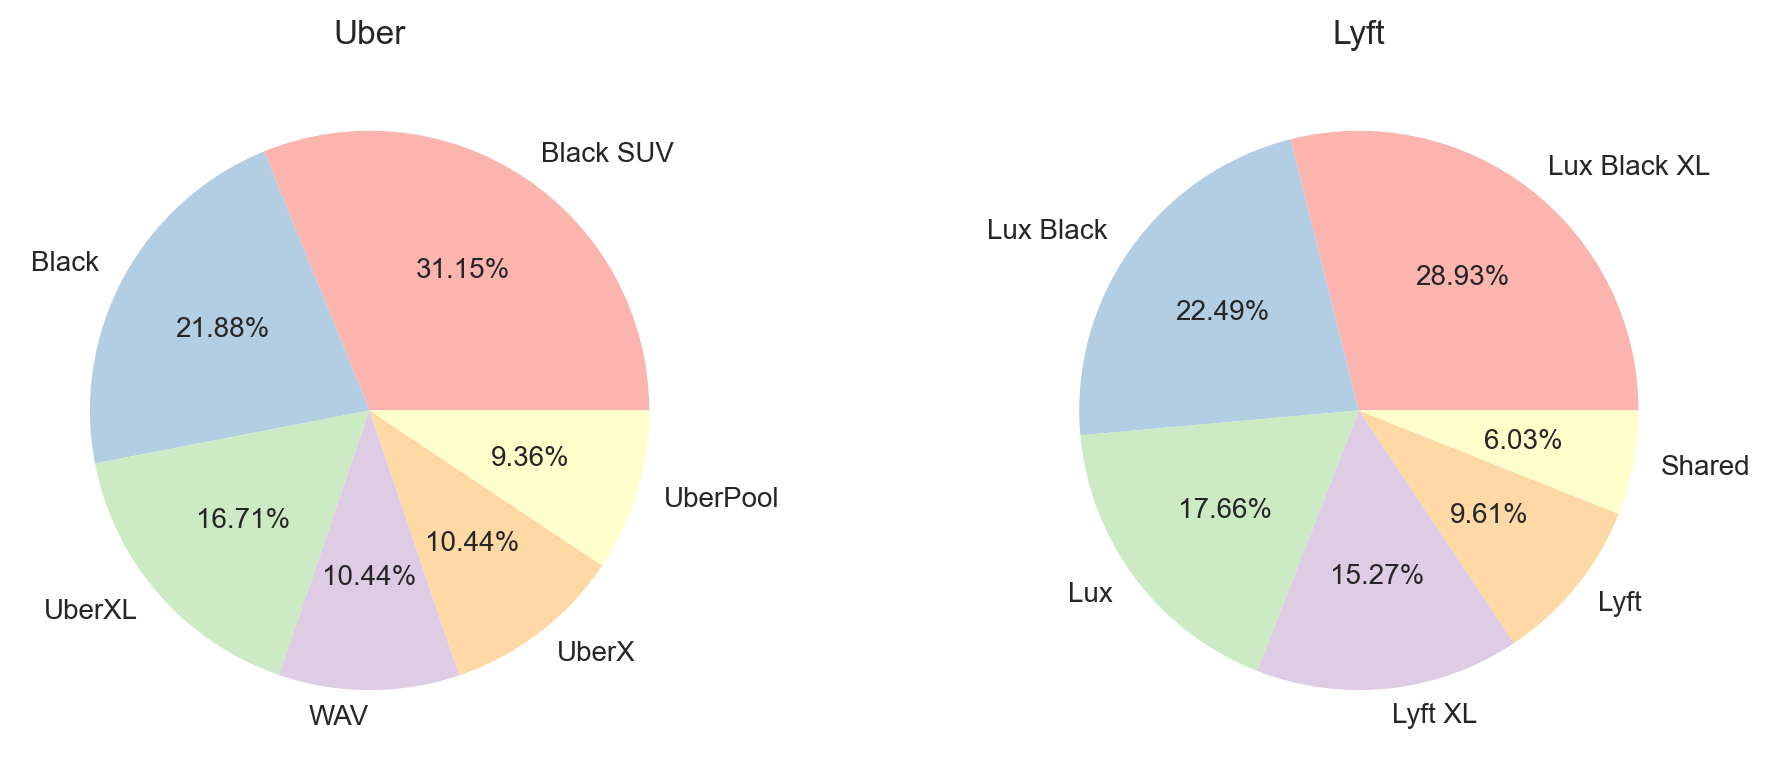

In [19]:
uber_name = df_without_outliers[df_without_outliers["cab_type"] == "Uber"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)
lyft_name = df_without_outliers[df_without_outliers["cab_type"] == "Lyft"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)

fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=1,ncols=2)

ax[0].pie(uber_name["price"],labels=uber_name.index,autopct="%.2f%%",colors=sns.color_palette("Pastel1"))
ax[0].set_title("Uber")

ax[1].pie(lyft_name["price"],labels=lyft_name.index,autopct="%.2f%%",colors=sns.color_palette("Pastel1"))
ax[1].set_title("Lyft")

plt.tight_layout()
plt.show()

Dari piechart di atas dapat dilihat bahwa tipe Black SUV paling banyak dipesan di Uber dengan 31.15%, tipe yang paling sedikit dipesan di Uber yakni UberPool dengan persentase 9.36%. Pada Lyft paling banyak dipesan adalah Lux Black XL 28.93% dan Shared yang paling sedikit dipesan di Lyft sebesar 6.03%.

### Place with Most Pick-ups (Source and Destination)

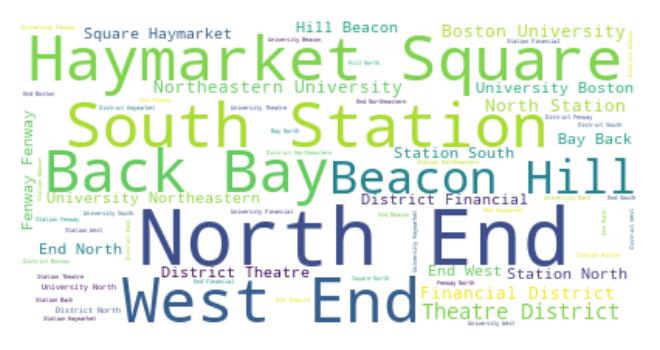

In [20]:
stopwords = set(STOPWORDS)
plt.figure(figsize=(4,4),dpi=200)
source_wordcloud = WordCloud(background_color='white',
                             stopwords=stopwords).generate(' '.join(df_without_outliers['source']))
plt.imshow(source_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Dapat dilihat dari wordcloud di atas bahwa North End merupakan titik penjemputan terbanyak, karena kata tersebut paling besar di wordcloud tersebut.

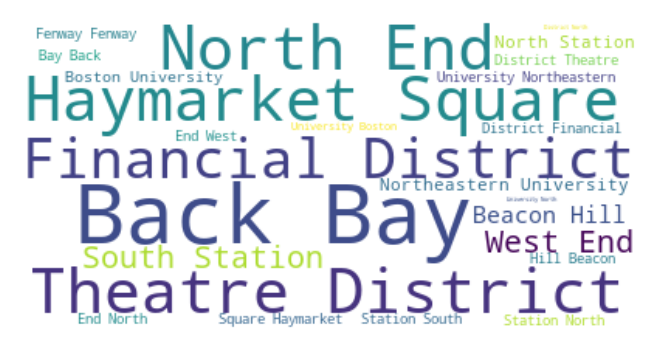

In [21]:
stopwords = set(STOPWORDS)

plt.figure(figsize=(4,4),dpi=200)
destination_wordcloud = WordCloud(background_color='white',
                             stopwords=stopwords).generate(' '.join(df_without_outliers['destination']))
plt.imshow(destination_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Dapat dilihat dari wordcloud di atas bahwa Back Bay merupakan titik pengantaran terbanyak, karena kata tersebut paling besar di wordcloud tersebut.

### How Distances Affect Price

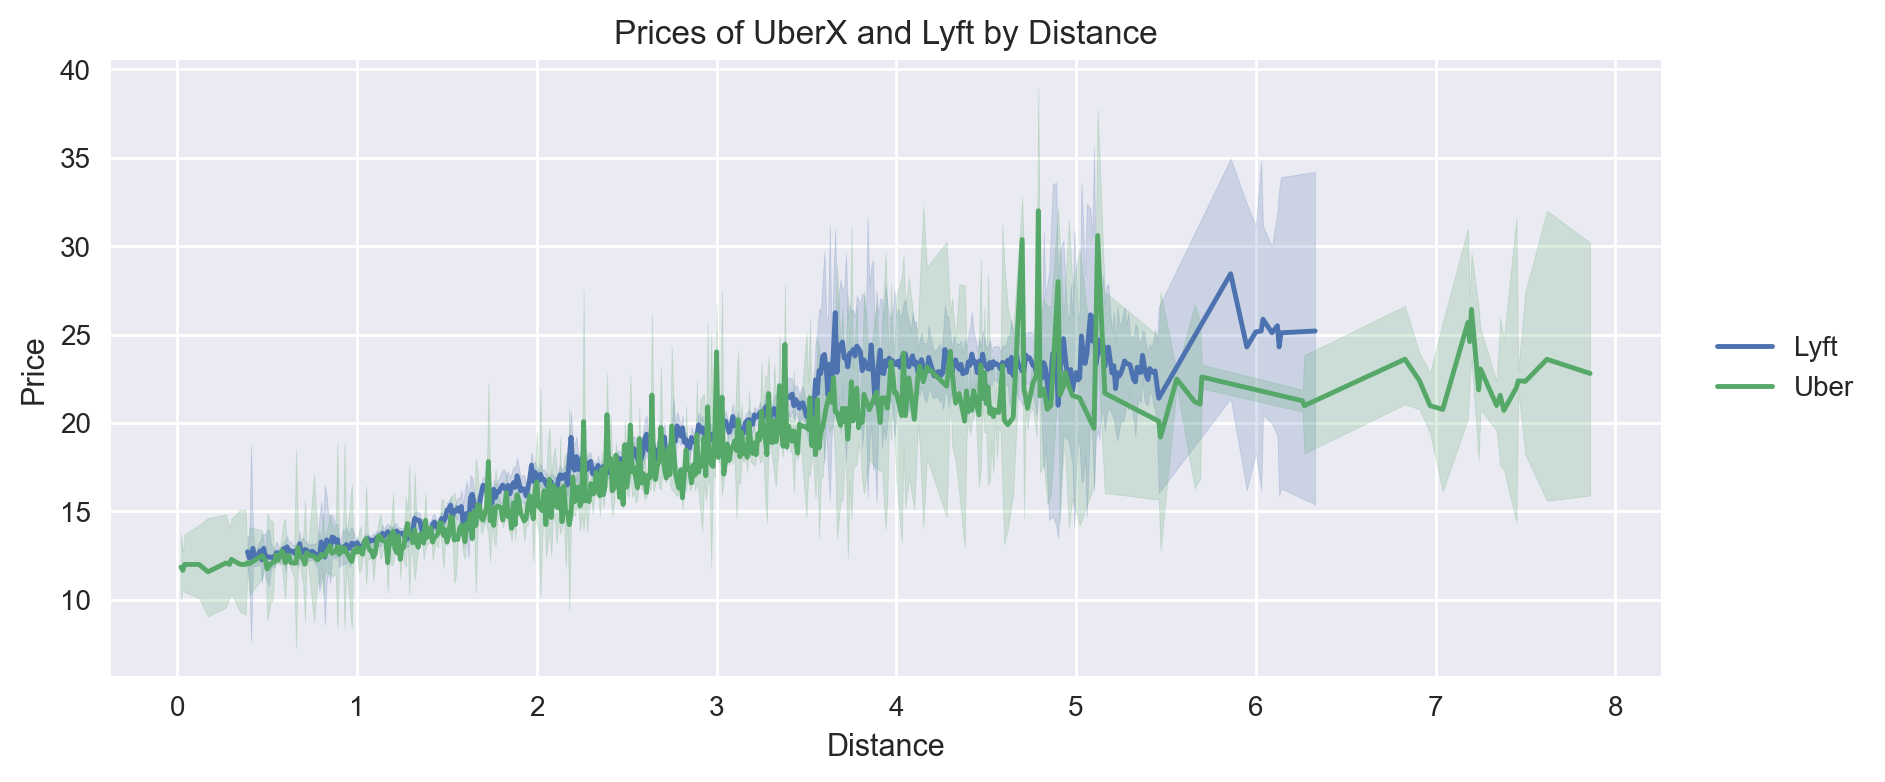

In [22]:
plt.figure(figsize=(10,4),dpi=200)
sns.lineplot(data=df_without_outliers,x="distance",y="price",hue="cab_type")
plt.title("Prices of UberX and Lyft by Distance")
plt.xlabel("Distance")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left")
plt.show()

Berdasarkan grafik diatas dapat dilihat bahwa semakin besar jarak yang ditempuh oleh Uber dan Lyft, maka semakin besar pula tarif perjalanannya. Lyft memiliki tarif lebih tinggi dibandingkan Uber walaupun jarak yang ditempuh tidak terlalu besar daripada Uber. Artinya, ada korelasi antara jarak yang ditempuh dengan tarif perjalanan.

### Do Cab Type Influence Surge Multiplier Price?

In [23]:
surge_price = df_without_outliers.pivot_table(index='surge_multiplier', columns=['name', 'cab_type'], values='price', fill_value=0)
surge_price.index = surge_price.index.map(int)
surge_price

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
cab_type,Uber,Uber,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Uber,Uber,Uber,Uber
surge_multiplier,,,,,,,,,,,,
1,20.487195,29.859943,17.113552,22.178923,30.684030,9.281424,14.735208,6.029893,8.7525,9.764453,15.642382,9.764398
1,0.000000,0.000000,21.495038,27.825400,36.443516,11.509698,18.482634,0.000000,0.0000,0.000000,0.000000,0.000000
1,0.000000,0.000000,26.178536,32.132503,39.268000,13.731984,22.579467,0.000000,0.0000,0.000000,0.000000,0.000000
1,0.000000,0.000000,29.231626,34.272727,0.000000,15.655992,26.056936,0.000000,0.0000,0.000000,0.000000,0.000000
2,0.000000,0.000000,31.262438,36.006276,0.000000,17.331658,28.118734,0.000000,0.0000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,22.519481,33.327586,0.000000,0.0000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,29.750000,41.000000,0.000000,0.0000,0.000000,0.000000,0.000000


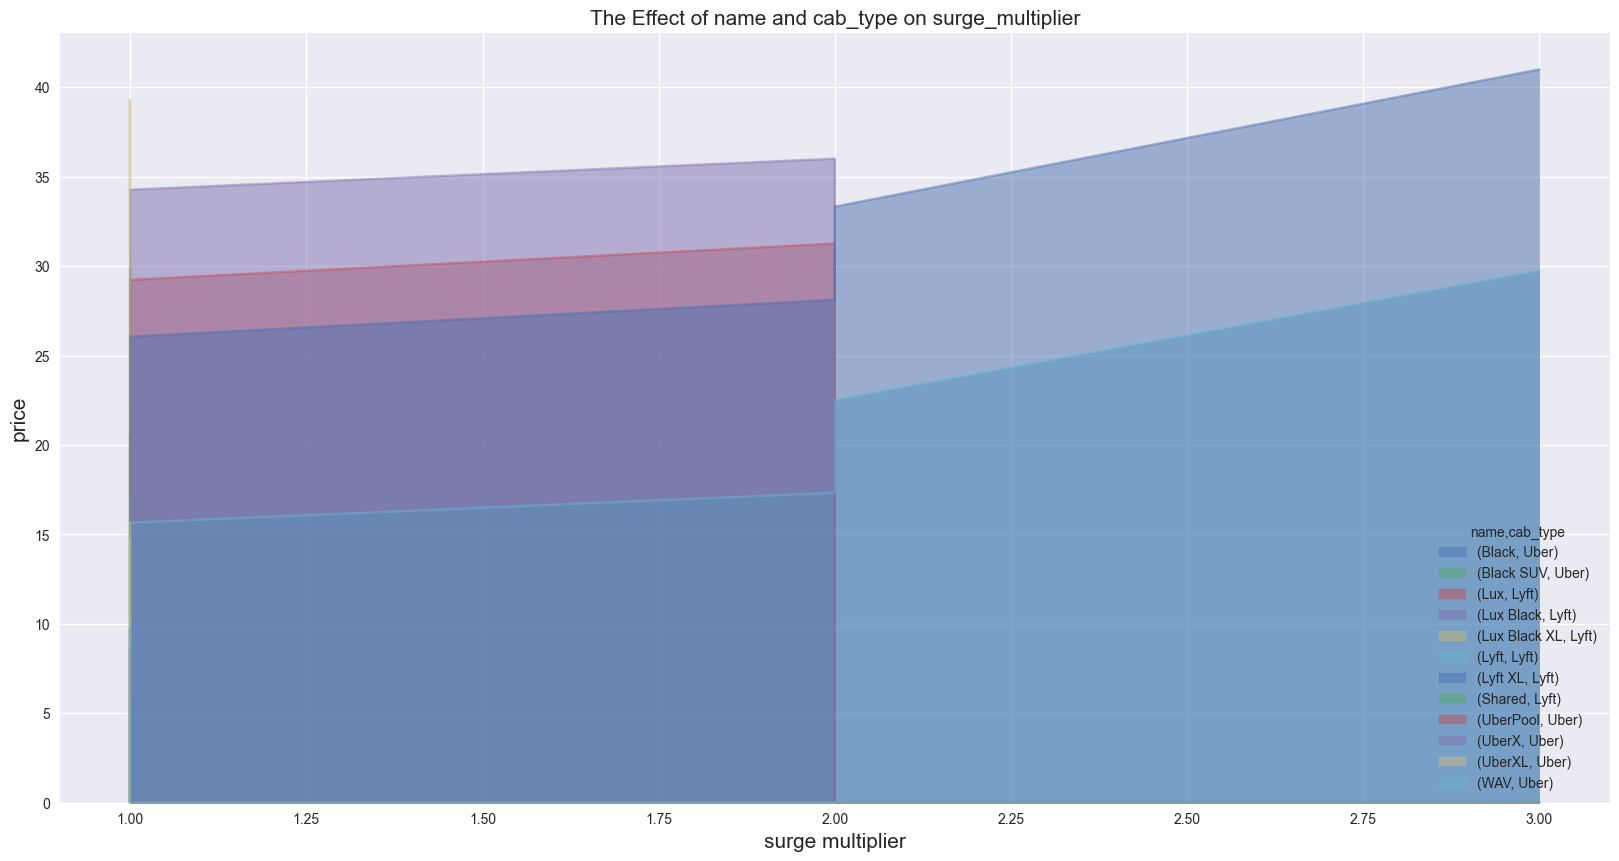

In [24]:
surge_price.plot(kind='area',
                stacked=False,
                figsize=(20,10)
                )
plt.title('The Effect of name and cab_type on surge_multiplier', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.xlabel('surge multiplier', fontsize=15)

plt.show()

Berdasarkan visualisasi data diatas, maka dapat disimpulkan bahwa:

- Jenis mobil dan tipe taksi yang dipesan berpengaruh kepada pengganda tarif, sehingga harga yang didapatkan bisa lebih mahal.
- Tipe uber hanya mengalami pengganda tarif sampai 1.0 saja.
- Pengganda tarif terbesar adalah jenis Lyft XL dengan harga 41 USD pada pengganda ke 3.00.

## F. Data Prepocessing

In [25]:
# Karena pada independent variabel terdapat data categorical, maka akan dilakukan LabelEncoder terlebih dahulu
le = LabelEncoder()

# Mendefinisikan variabel independent (X) dan variabel dependent (y)
X = df_without_outliers.copy().drop("price",axis=1).apply(le.fit_transform)
y = df_without_outliers.copy()["price"]

# Split dataframe menjadi data training dan data testing dengan ratio 70:30
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1221)
print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

# Karena setiap variabel independen memiliki scale yang berbeda, maka akan dilakukan standarisasi dengan *StandardScaler*
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Training dataset	: 442670
Testing dataset		: 189717


## G-H. Models Definition & Training

### Basic Linear Regression Model

In [26]:
# Melakukan create model dan train model basic linear regression
base_model = LinearRegression()
base_model.fit(scaled_X_train,y_train)

# Memprediksi price dan akan dilihat nilai R-Square scorenya
base_pred = base_model.predict(scaled_X_test)
r2_score(y_test,base_pred)

0.536516011372483

### Polynomial Regression (d = 2)

In [27]:
# Transformasi variabel independen untuk model regresi polinomial dengan derajat 2
poly_2_X = PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)

# Melakukan split dataframe (data training dan data testing, ratio 70:30) dan standarisasi pada variabel independent yang telah ditransformasi
poly_2_X_train,poly_2_X_test,y_train,y_test = train_test_split(poly_2_X,y,test_size=0.3,random_state=1221)
scaled_poly_2_X_train = scaler.fit_transform(poly_2_X_train)
scaled_poly_2_X_test = scaler.transform(poly_2_X_test)

# Create dan train model polynomial regression (d=2)
poly_2_model = LinearRegression()
poly_2_model.fit(scaled_poly_2_X_train,y_train)

# Memprediksi price dan akan dilihat nilai R-Square scorenya
poly_2_pred = poly_2_model.predict(scaled_poly_2_X_test)
r2_score(y_test,poly_2_pred)

0.7628578797474675

### Polynomial Regression (d = 3)

In [28]:
# Transformasi variabel independen untuk model regresi polinomial dengan derajat 3
poly_3_X = PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)

# Melakukan split dataframe (data training dan data testing, ratio 70:30) dan standarisasi pada variabel independent yang telah ditransformasi
poly_3_X_train,poly_3_X_test,y_train,y_test = train_test_split(poly_3_X,y,test_size=0.3,random_state=1221)
scaled_poly_3_X_train = scaler.fit_transform(poly_3_X_train)
scaled_poly_3_X_test = scaler.transform(poly_3_X_test)

# Create dan train model polynomial regression (d=3)
poly_3_model = LinearRegression()
poly_3_model.fit(scaled_poly_3_X_train,y_train)

# Memprediksi price dan akan dilihat nilai R-Square scorenya
poly_3_pred = poly_3_model.predict(scaled_poly_3_X_test)
r2_score(y_test,poly_3_pred)

0.9600369524726013

## I-J. Models Evaluation

Mengevaluasi model dengan metrics sbb:
- $ MAE = \frac{1}{n}\sum\limits_{i=1}^n |y_{i} - \hat{y}_{i}| $
- $ RMSE = \sqrt{\frac{1}{n}\sum\limits_{i=1}^n (y_{i} - \hat{y}_{i})^2} $
- $ R^2 = 1 - \frac{\sum(y_{i} - \hat{y}_{i})^2}{\sum(y_{i} - \bar{y}_{i})^2} $

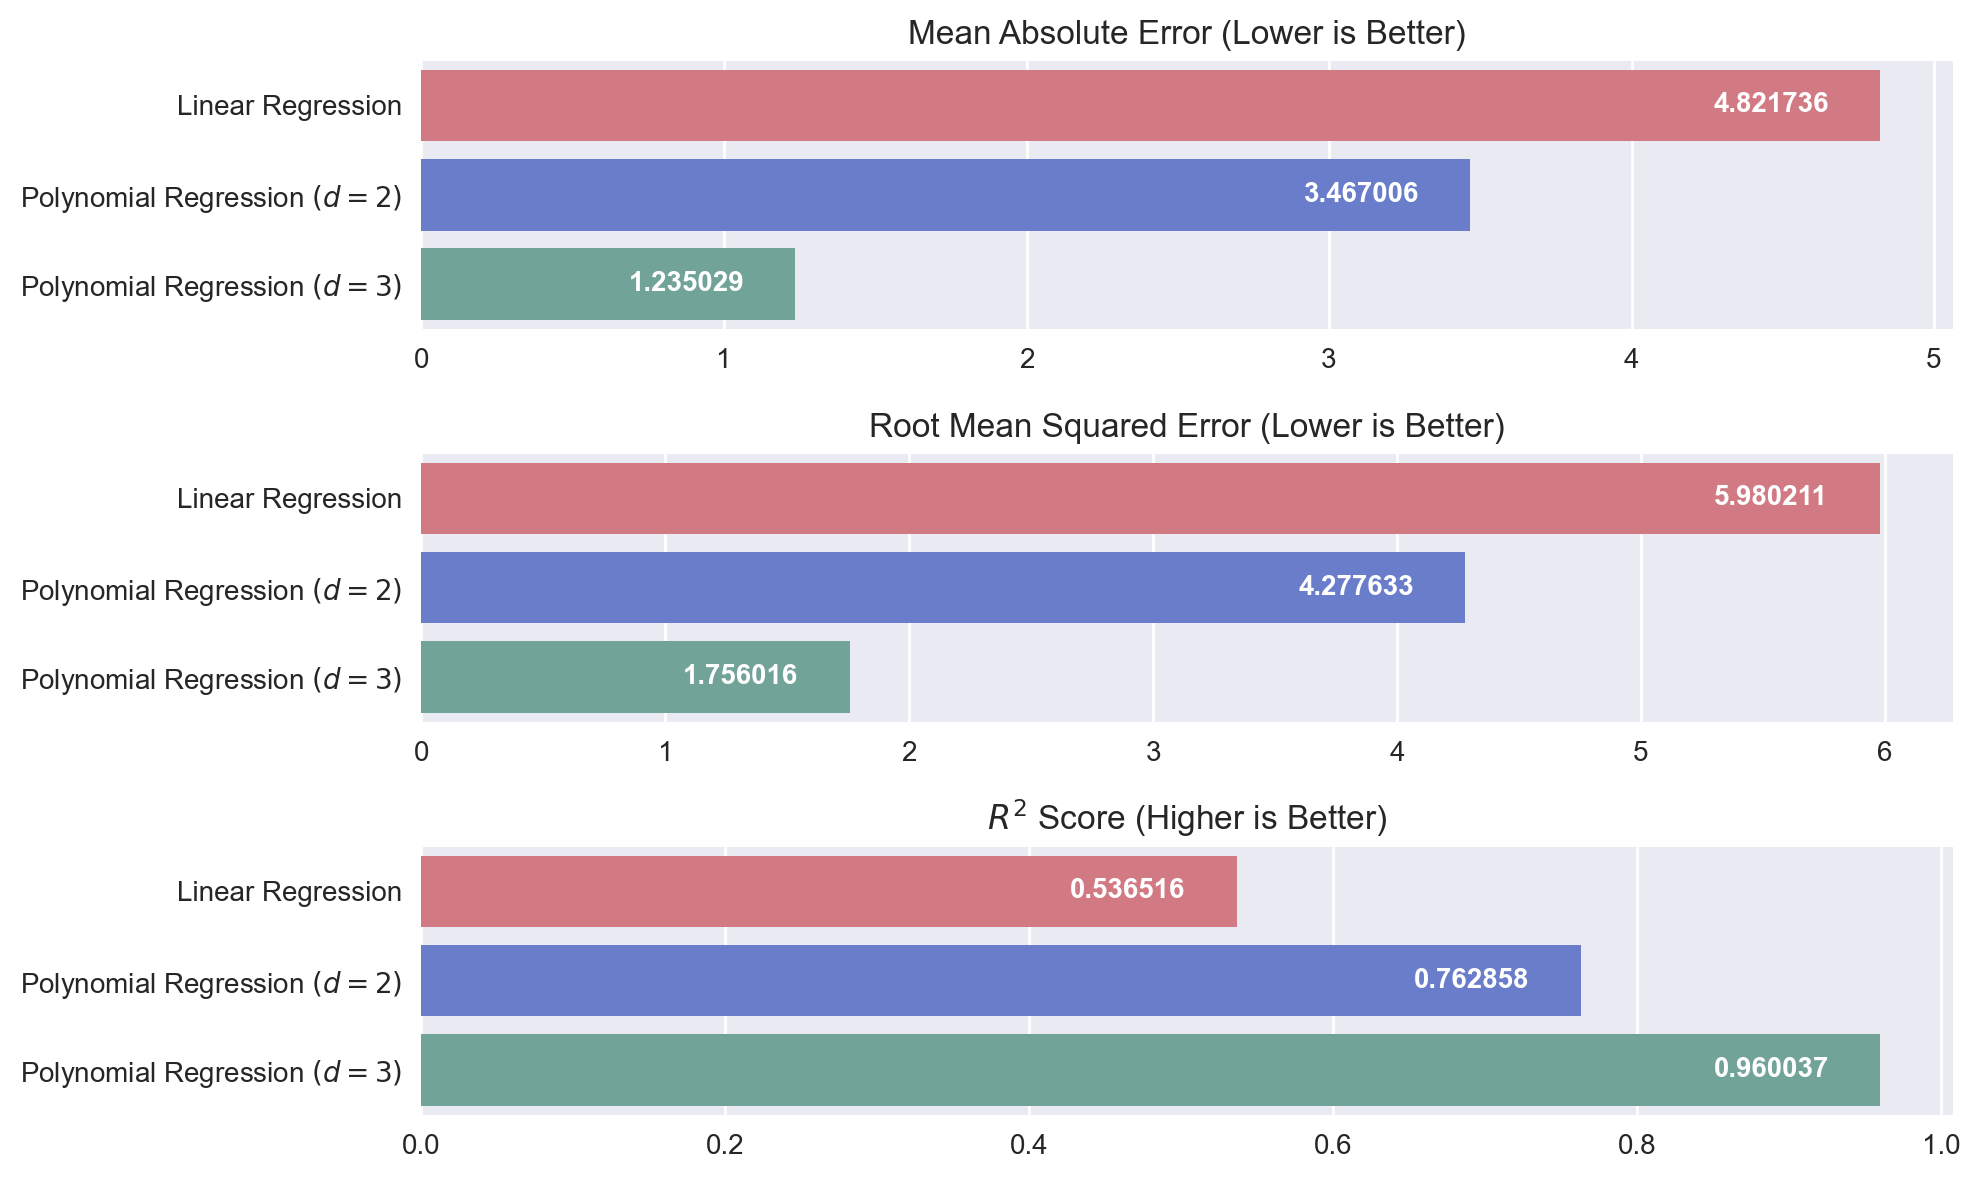

In [29]:
fig,ax = plt.subplots(figsize=(10,6),dpi=200,nrows=3,ncols=1)

barplot = sns.barplot(
    x=[mean_absolute_error(y_test,base_pred),mean_absolute_error(y_test,poly_2_pred),mean_absolute_error(y_test,poly_3_pred)],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$"],
    palette=["#E06C78","#5874DC","#6AAB9C"],
    ax=ax[0]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[0].set_title("Mean Absolute Error (Lower is Better)")

barplot = sns.barplot(
    x=[np.sqrt(mean_squared_error(y_test,base_pred)),np.sqrt(mean_squared_error(y_test,poly_2_pred)),np.sqrt(mean_squared_error(y_test,poly_3_pred))],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$"],
    palette=["#E06C78","#5874DC","#6AAB9C"],
    ax=ax[1]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[1].set_title("Root Mean Squared Error (Lower is Better)")

barplot = sns.barplot(
    x=[r2_score(y_test,base_pred),r2_score(y_test,poly_2_pred),r2_score(y_test,poly_3_pred)],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$"],
    palette=["#E06C78","#5874DC","#6AAB9C"],
    ax=ax[2]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[2].set_title("$ R^{2} $ Score (Higher is Better)")

plt.tight_layout()
plt.show()

Berdasarkan plot di atas, dapat dilihat bahwa polynomial regression ($d=3$) merupakan model terbaik karena memiliki nilai MAE dan RMSE terendah dan memiliki $R^2$ score tertinggi.

Untuk memvisualisasikan perbandingan antara asli dan hasil prediksi dari model regresi, dapat digunakan density plot. 

Reference: [Stack Overflow](https://stackoverflow.com/questions/52404857/how-do-i-plot-for-multiple-linear-regression-model-using-matplotlib)

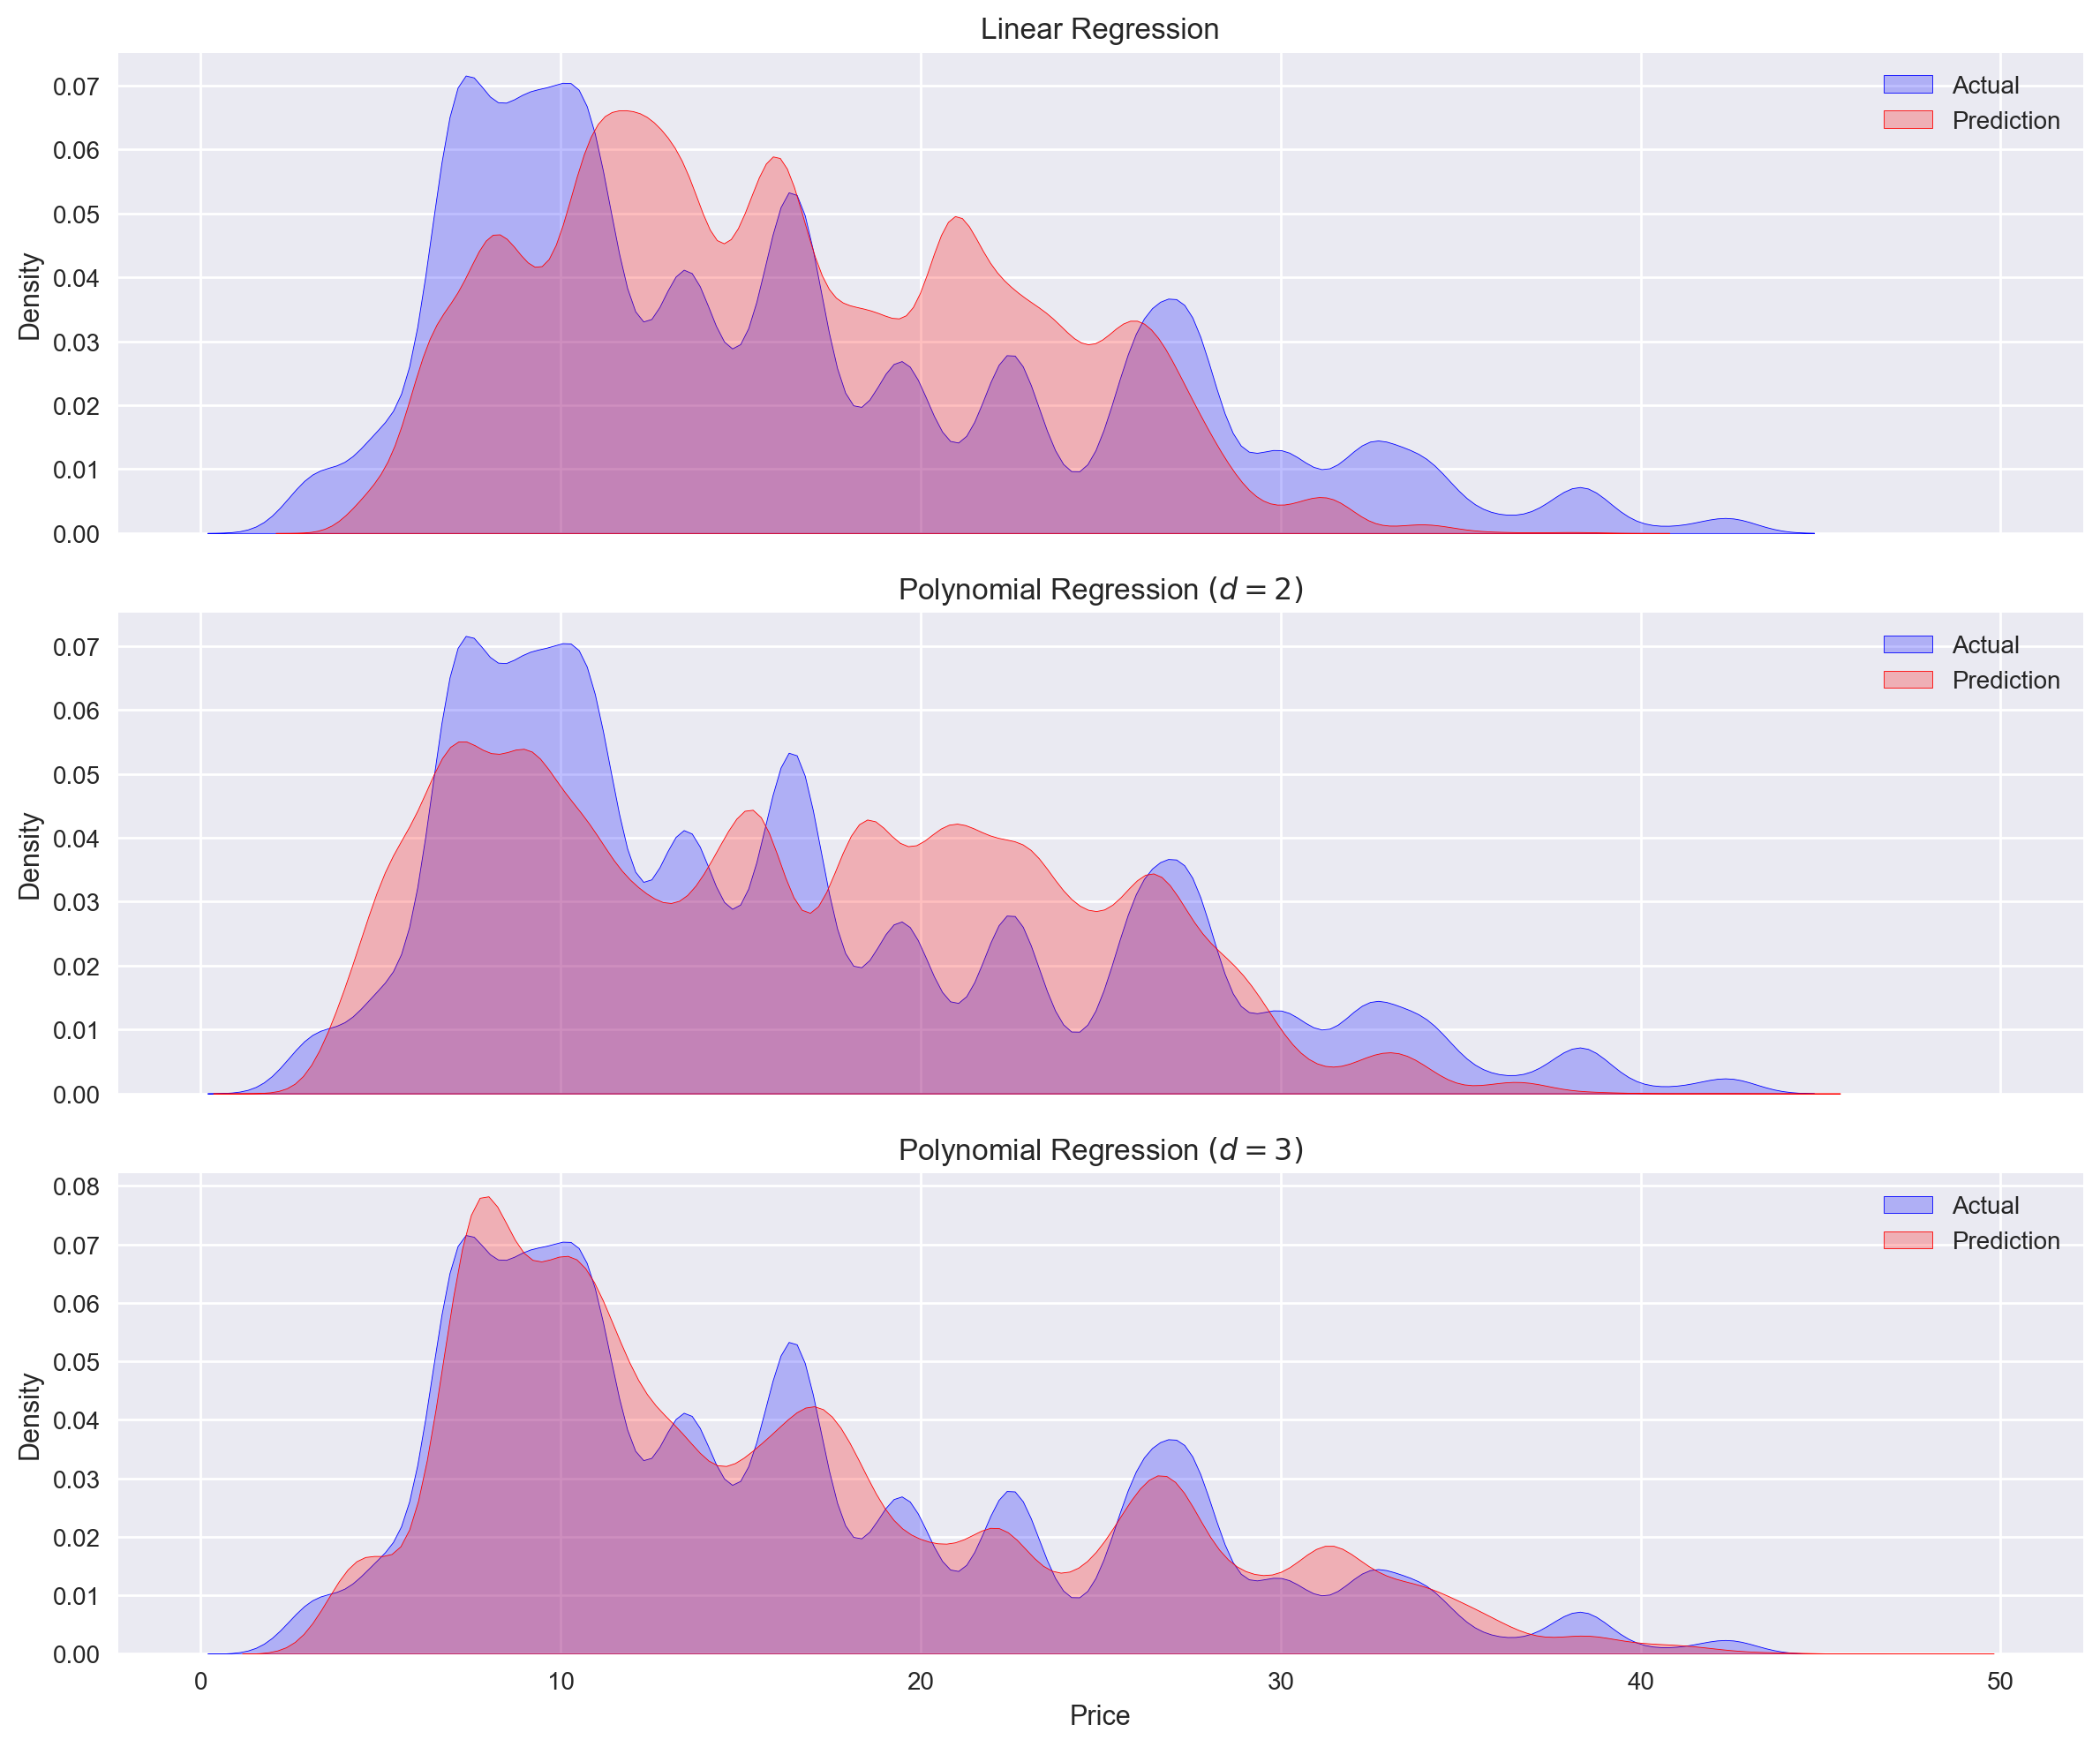

In [30]:
fig,ax = plt.subplots(figsize=(12,10),dpi=200,nrows=3,ncols=1,sharex=True)

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[0])
sns.kdeplot(base_pred,color="red",fill=True,label="Prediction",ax=ax[0])
ax[0].set_title("Linear Regression")
ax[0].set_xlabel("Price")
ax[0].legend(loc="upper right")

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[1])
sns.kdeplot(poly_2_pred,color="red",fill=True,label="Prediction",ax=ax[1])
ax[1].set_title("Polynomial Regression $(d=2)$")
ax[1].set_xlabel("Price")
ax[1].legend(loc="upper right")

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[2])
sns.kdeplot(poly_3_pred,color="red",fill=True,label="Prediction",ax=ax[2])
ax[2].set_title("Polynomial Regression $(d=3)$")
ax[2].set_xlabel("Price")
ax[2].legend(loc="upper right")

plt.tight_layout()
plt.show()

Berdasarkan plot di atas, dapat dilihat bahwa polynomial regression ($d=3$) merupakan model terbaik karena prediksi paling akurat.

Untuk melihat prediksi lebih jelas dapat dibuat dataframe sebagai berikut

In [31]:
pd.DataFrame({
    "Actual":y_test,
    "Linear Regression Prediction":base_pred,
    "Polynomial Regression (d = 2) Prediction":poly_2_pred,
    "Polynomial Regression (d = 3) Prediction":poly_3_pred
}).reset_index(drop=True)

,Actual,Linear Regression Prediction,Polynomial Regression (d = 2) Prediction,Polynomial Regression (d = 3) Prediction
0,19.5,26.004328,25.691387,21.012055
1,13.0,7.898906,15.688335,13.113770
2,16.5,15.783111,22.682537,17.243958
3,13.0,14.845504,11.784008,13.934144
4,22.5,18.725597,25.845287,21.835999
...,...,...,...,...
189712,19.5,23.273568,19.069347,17.274659
189713,27.5,17.799856,23.131298,30.616914
189714,38.5,21.744775,27.992046,37.196076
189715,21.5,27.616926,27.897716,23.314179


Setelah dilakukan evaluasi pada semua model, akan dibuat final models dan akan ditulis equationnya seperti berikut. Pertama untuk basic linear regression model.

In [32]:
final_base_model = LinearRegression().fit(X,y)

x_symbol = [sp.Symbol(f"({i})") for i in X.columns.str.replace("_","")]
y_symbol = sp.Symbol("\hat{price}")

sums = np.round(final_base_model.intercept_,6)
for i in range(len(X.columns)):
    sums += x_symbol[i] * np.round(final_base_model.coef_[i],6)

sp.Eq(y_symbol,sums)

Eq(\hat{price}, 8.424558*(cabtype) + 0.02053*(destination) + 0.026517*(distance) - 1.70659*(name) + 0.985837*(productid) + 0.032357*(source) + 3.060827*(surgemultiplier) + 10.630595)

Berikut untuk polynomial regression ($d=2$) model. Dapat dilihat bahwa model menjadi lebih kompleks.

In [33]:
final_poly_2_model = LinearRegression().fit(poly_2_X,y)

x_symbol = [sp.Symbol(f"({i})") for i in X.columns.str.replace("_","")]

n = 1
x_symbol_ = []
for i in x_symbol:
    x_symbol_.append(i**2)
    for j in x_symbol[n:]:
        x_symbol_.append(i * j)
    n += 1
x_symbol = x_symbol + x_symbol_

y_symbol = sp.Symbol("\hat{price}")

sums = np.round(final_poly_2_model.intercept_,6)
for i in range(poly_2_X.shape[-1]):
    sums += x_symbol[i] * np.round(final_poly_2_model.coef_[i],6)

sp.Eq(y_symbol,sums)

Eq(\hat{price}, 51.776482*(cabtype)**2 - 0.021771*(cabtype)*(destination) + 0.010123*(cabtype)*(distance) + 3.824988*(cabtype)*(name) - 23.19402*(cabtype)*(productid) + 0.005098*(cabtype)*(source) + 51.776482*(cabtype) - 0.007471*(destination)**2 - 0.00046*(destination)*(distance) - 0.00429*(destination)*(name) + 0.000189*(destination)*(productid) - 0.009423*(destination)*(source) + 0.012998*(destination)*(surgemultiplier) + 0.270981*(destination) - 5.0e-6*(distance)**2 - 0.002285*(distance)*(name) + 0.001838*(distance)*(productid) - 0.000293*(distance)*(source) + 0.004687*(distance)*(surgemultiplier) + 0.030543*(distance) + 0.065063*(name)**2 + 0.251122*(name)*(productid) - 0.00463*(name)*(source) + 0.093871*(name)*(surgemultiplier) - 5.292894*(name) - 1.737752*(productid)**2 + 0.003977*(productid)*(source) + 0.138786*(productid)*(surgemultiplier) + 28.714525*(productid) - 0.00876*(source)**2 - 0.014259*(source)*(surgemultiplier) + 0.226614*(source) - 0.396147*(surgemultiplier)**2 + 2

Berikut untuk polynomial regression ($d=3$) model. Akan tetapi untuk meminimalisir computational cost, lebih baik equationnya tidak akan ditampilkan kali ini. 

In [34]:
final_poly_3_model = LinearRegression().fit(poly_3_X,y)

Save semua final models untuk kemudian hari.

In [35]:
final_models = [final_base_model,final_poly_2_model,final_poly_3_model]
file_names = ["linear_regression","polynomial_2d_regression","polynomial_3d_regression"]

for i,j in zip(final_models,file_names):
    dump(i,j + ".joblib")
    print(f"{j}.joblib has been saved successfully!")

linear_regression.joblib has been saved successfully!
polynomial_2d_regression.joblib has been saved successfully!
polynomial_3d_regression.joblib has been saved successfully!


# K. Conclusion

Berdasarkan analisis yang telah dilakukan, dapat disimpulkan bahwa model terbaik untuk memprediksi **price** dari transportasi Uber dan Lyft adalah polynomial regression dengan derajat 3 atau $d=3$. Karena model tersebut memiliki nilai MAE dan RMSE terendah serta $R^2$ score tertinggi dibanding model lainnya. Maka prediksinya paling mendekati ke actual atau dengan kata lain prediksinya paling akurat.